In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_csv("data/willhaben_linz_rent.csv")
df.head()

,Title,Price,Size,Rooms,Postcode,URL
0,Großzügige Altbauwohnung mit Flair - Nähe Südb...,1200,110,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
1,Charmante 2-Zimmer-Wohnung mit Balkon am Römer...,73480,44,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
2,"Lichtdurchflutete, große 2 Zimmer-Neubauwohnun...",139902,101,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
3,Stilvolle 2-Zimmer Maisonetten in der Museumst...,89081,60,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
4,"Schöne 2,5- Zimmer Wohnung in Urfahr mit Balko...",74430,54,2.0,4040,https://www.willhaben.at/iad/immobilien/d/miet...


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [4]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,title,price,size,rooms,postcode,url
0,großzügige_altbauwohnung_mit_flair_-_nähe_südb...,1200,110,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
1,charmante_2-zimmer-wohnung_mit_balkon_am_römer...,73480,44,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
2,"lichtdurchflutete,_große_2_zimmer-neubauwohnun...",139902,101,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
3,stilvolle_2-zimmer_maisonetten_in_der_museumst...,89081,60,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
4,"schöne_2,5-_zimmer_wohnung_in_urfahr_mit_balko...",74430,54,2.0,4040,https://www.willhaben.at/iad/immobilien/d/miet...


In [6]:
df.drop('url',axis =1 )

,title,price,size,rooms,postcode
0,großzügige_altbauwohnung_mit_flair_-_nähe_südb...,1200,110,3.0,4020
1,charmante_2-zimmer-wohnung_mit_balkon_am_römer...,73480,44,2.0,4020
2,"lichtdurchflutete,_große_2_zimmer-neubauwohnun...",139902,101,2.0,4020
3,stilvolle_2-zimmer_maisonetten_in_der_museumst...,89081,60,2.0,4020
4,"schöne_2,5-_zimmer_wohnung_in_urfahr_mit_balko...",74430,54,2.0,4040
...,...,...,...,...,...
264,penthouse_in_urfahr_mit_großer_dachterrasse_un...,183128,104,3.0,4040
265,erstbezug!_toplage!_traumausblick!_sehr_großzü...,139755,68,2.5,4020
266,stilvolle_maisonette-mietwohnung_mit_balkon_im...,1290,130,4.0,4030
267,charmante_86m2_stadtwohnung_in_linz,1299,86,3.0,4020


In [7]:
df = df[df.price <= 2500]

In [8]:
df.head()

,title,price,size,rooms,postcode,url
0,großzügige_altbauwohnung_mit_flair_-_nähe_südb...,1200,110,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
6,altbau_-_73_m2_-_3_zimmer_-_kuk_nähe,1055,73,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
9,"kurzzeitmiete:_""garten_eden""_-_anderes_wohnen_...",2400,54,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
10,großzügige_wohnung_85_m2_zentral_gelegen_und_d...,880,85,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...
11,"moderne,_helle_neubauwohnung_mit_balkon_in_ruh...",1100,60,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...


Text(0.5, 1.0, 'Distribution of prices')

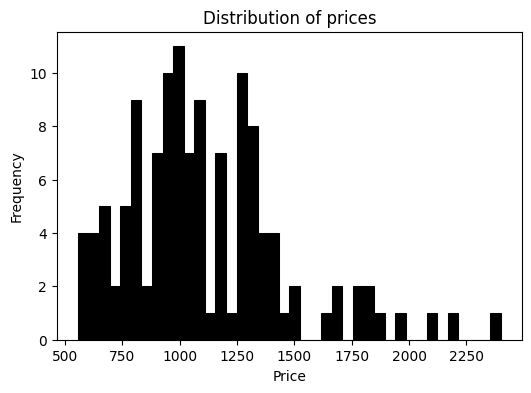

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')


In [10]:
for row in df:
    df["price_per_m2"] = round(df["price"] / df["size"], 2)

In [11]:
df.head()

,title,price,size,rooms,postcode,url,price_per_m2
0,großzügige_altbauwohnung_mit_flair_-_nähe_südb...,1200,110,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...,10.91
6,altbau_-_73_m2_-_3_zimmer_-_kuk_nähe,1055,73,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...,14.45
9,"kurzzeitmiete:_""garten_eden""_-_anderes_wohnen_...",2400,54,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...,44.44
10,großzügige_wohnung_85_m2_zentral_gelegen_und_d...,880,85,3.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...,10.35
11,"moderne,_helle_neubauwohnung_mit_balkon_in_ruh...",1100,60,2.0,4020,https://www.willhaben.at/iad/immobilien/d/miet...,18.33


Text(0.5, 1.0, 'Distribution of prices')

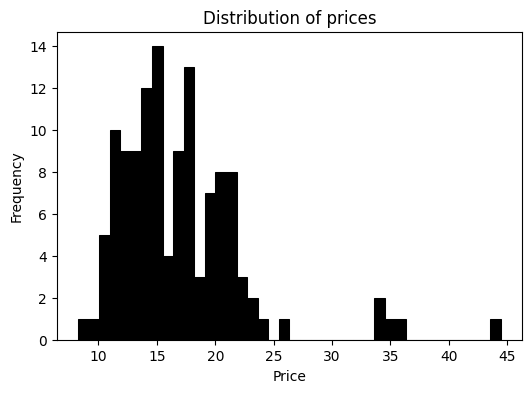

In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price_per_m2, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

In [21]:
X = df[['size','rooms','price_per_m2','postcode']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = model.predict(X_test)

In [24]:
rmse = root_mean_squared_error(y_test,y_pred)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 70.14


In [27]:
actual_price = y_test.iloc[4]
predicted_price = y_pred[4]

print(actual_price)
print(predicted_price)

price    1309
Name: 115, dtype: int64
[1302.89256068]
